# Prestige

In [1]:
install.packages("carData")
install.packages("corrplot")
install.packages("car")
install.packages("modelr")
install.packages("lmtest")
install.packages("leaps")

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/carData_3.0-5.zip'
Content type 'application/zip' length 1708104 bytes (1.6 MB)
downloaded 1.6 MB



package ‘carData’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\Rtmp694WtN\downloaded_packages


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/corrplot_0.95.zip'
Content type 'application/zip' length 3825989 bytes (3.6 MB)
downloaded 3.6 MB



package ‘corrplot’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\Rtmp694WtN\downloaded_packages


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/car_3.1-3.zip'
Content type 'application/zip' length 1541558 bytes (1.5 MB)
downloaded 1.5 MB



package ‘car’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\Rtmp694WtN\downloaded_packages


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/modelr_0.1.11.zip'
Content type 'application/zip' length 204054 bytes (199 KB)
downloaded 199 KB



package ‘modelr’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\Rtmp694WtN\downloaded_packages


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/lmtest_0.9-40.zip'
Content type 'application/zip' length 411252 bytes (401 KB)
downloaded 401 KB



package ‘lmtest’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\Rtmp694WtN\downloaded_packages


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.5/leaps_3.2.zip'
Content type 'application/zip' length 88984 bytes (86 KB)
downloaded 86 KB



package ‘leaps’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Yura\AppData\Local\Temp\Rtmp694WtN\downloaded_packages


In [2]:
data <- carData::Prestige
head(data)

                    education income women prestige census type
gov.administrators      13.11  12351 11.16     68.8   1113 prof
general.managers        12.26  25879  4.02     69.1   1130 prof
accountants             12.77   9271 15.70     63.4   1171 prof
purchasing.officers     11.42   8865  9.11     56.8   1175 prof
chemists                14.62   8403 11.68     73.5   2111 prof
physicists              15.64  11030  5.13     77.6   2113 prof

In [4]:
str(data)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [5]:
anyNA(data)

[1] TRUE

In [6]:
cor(data[ ,-6])

            education     income       women   prestige     census
education  1.00000000  0.5775802  0.06185286  0.8501769 -0.8230882
income     0.57758023  1.0000000 -0.44105927  0.7149057 -0.3610023
women      0.06185286 -0.4410593  1.00000000 -0.1183342 -0.2270028
prestige   0.85017689  0.7149057 -0.11833419  1.0000000 -0.6345103
census    -0.82308821 -0.3610023 -0.22700277 -0.6345103  1.0000000

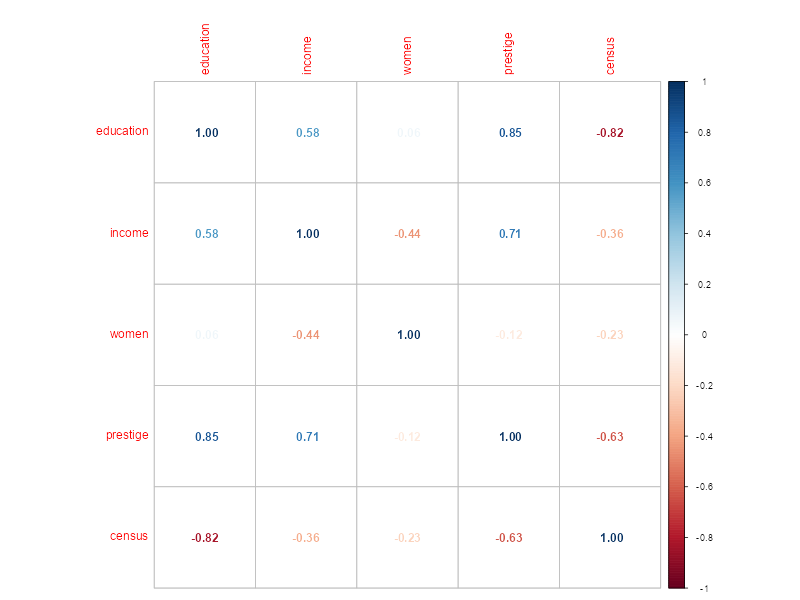

In [9]:
library(corrplot)
corrplot(cor(data[,-6]) , method = "number") 

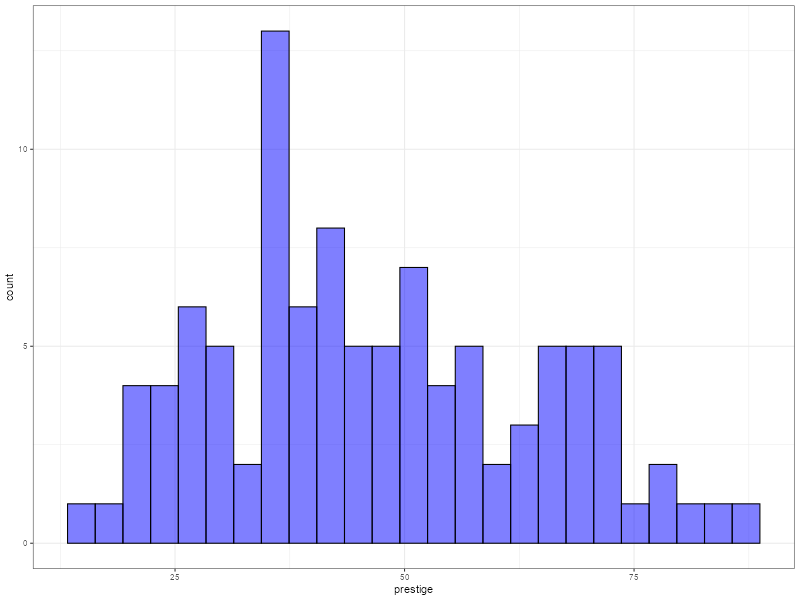

In [10]:
library(ggplot2)

ggplot(data, aes(prestige)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

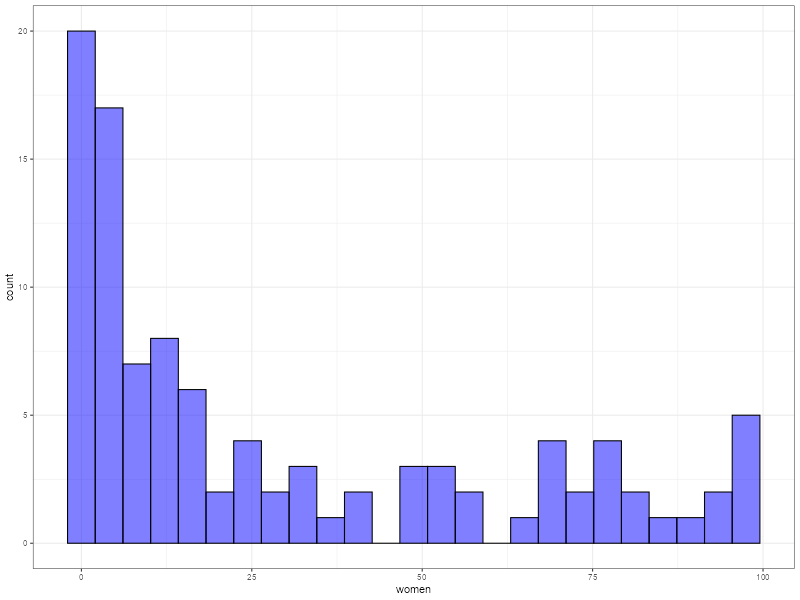

In [11]:
ggplot(data, aes(women)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

In [12]:
model1 <- lm(prestige ~ education, data = data)
summary(model1)


Call:
lm(formula = prestige ~ education, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.0397  -6.5228   0.6611   6.7430  18.1636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -10.732      3.677  -2.919  0.00434 ** 
education      5.361      0.332  16.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.103 on 100 degrees of freedom
Multiple R-squared:  0.7228,	Adjusted R-squared:   0.72 
F-statistic: 260.8 on 1 and 100 DF,  p-value: < 2.2e-16


In [ ]:
model2 <- lm(prestige ~ sqrt(education), data = data)
summary(model2)


Call:
lm(formula = prestige ~ sqrt(1/education), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.6244  -6.8589   0.1964   7.5458  21.5658 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        155.779      7.949   19.60   <2e-16 ***
sqrt(1/education) -348.481     25.224  -13.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.14 on 100 degrees of freedom
Multiple R-squared:  0.6562,	Adjusted R-squared:  0.6528 
F-statistic: 190.9 on 1 and 100 DF,  p-value: < 2.2e-16


In [16]:
model3 <- lm(prestige ~ education + income, data = data)
summary(model3)


Call:
lm(formula = prestige ~ education + income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.8477787  3.2189771  -2.127   0.0359 *  
education    4.1374444  0.3489120  11.858  < 2e-16 ***
income       0.0013612  0.0002242   6.071 2.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16


In [17]:
model4 <- lm(prestige ~ education + log(income), data = data)
summary(model4)


Call:
lm(formula = prestige ~ education + log(income), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0346  -4.5657  -0.1857   4.0577  18.1270 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -95.1940    10.9979  -8.656 9.27e-14 ***
education     4.0020     0.3115  12.846  < 2e-16 ***
log(income)  11.4375     1.4371   7.959 2.94e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.145 on 99 degrees of freedom
Multiple R-squared:  0.831,	Adjusted R-squared:  0.8275 
F-statistic: 243.3 on 2 and 99 DF,  p-value: < 2.2e-16
